<a href="https://colab.research.google.com/github/JoaoMoreno19/TrabalhoColab/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise Exploratória e Visualização de Dados:**
1. Explore a distribuição de características-chave, como idade, sexo, classe socioeconômica e taxa de sobrevivência.
2. Identifique padrões ou correlações entre as características e a sobrevivência dos passageiros.
3. Visualize esses padrões por meio de gráficos de barras, histogramas, gráficos de dispersão ou boxplots.
4. Investigue se existem diferenças na taxa de sobrevivência entre grupos, como homens e mulheres, ou diferentes classes de passageiros.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
def show_box(value):
  sns.set(font_scale=2)
  sns.heatmap([[value]], annot=True)
  sns.set(font_scale=1)

<Axes: xlabel='Age', ylabel='Count'>

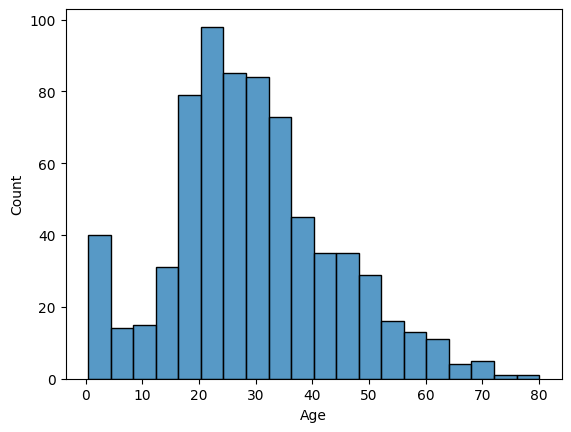

In [ ]:
sns.histplot(data=df_train, x="Age")

<Axes: xlabel='Sex', ylabel='Count'>

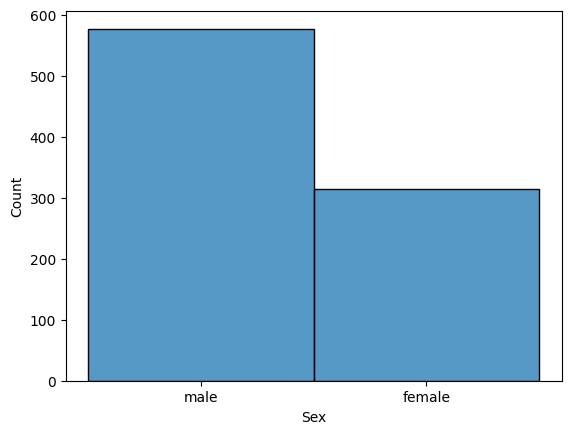

In [ ]:
sns.histplot(data=df_train, x="Sex")

<Axes: ylabel='Pclass'>

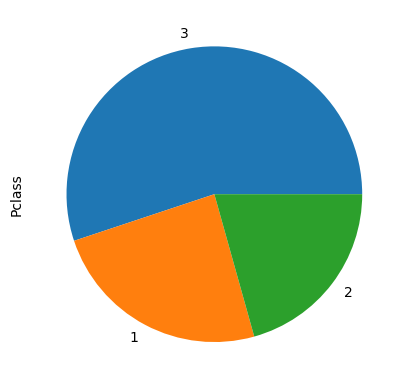

In [ ]:
df_train["Pclass"].value_counts().plot.pie()

<Axes: xlabel='Resultado', ylabel='count'>

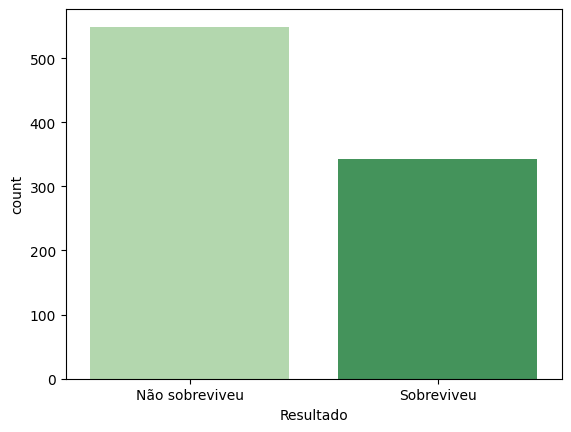

In [ ]:
df_train.loc[df_train['Survived'] == 1, 'Resultado'] = 'Sobreviveu'
df_train.loc[df_train['Survived'] == 0, 'Resultado'] = 'Não sobreviveu'
sns.countplot(data=df_train, x='Resultado', palette='Greens')

<Axes: xlabel='Pclass', ylabel='count'>

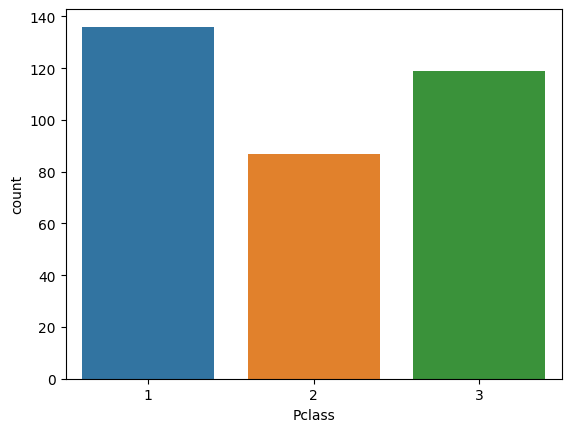

In [ ]:
sobrevivente = df_train[df_train['Survived'] == 1]
sns.countplot(data = sobrevivente, x='Pclass')

<Axes: xlabel='Sex', ylabel='Survived'>

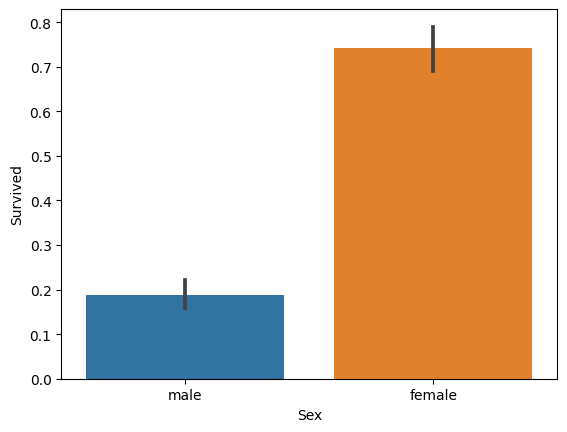

In [ ]:
sns.barplot(data=df_train, x="Sex", y="Survived")

Com essa análise exploratória e essa visualização dos dados pudemos compreender a
distribuição dos dados referente a cada item, sexo, classe...
Podemos fazer uma análise para identificar as desigualdades e diferenças dentro dos dados.

**Medidas de Tendência Central e Medidas de Dispersão:**
1. Calcule a média de idades dos passageiros e identifique possíveis diferenças entre os grupos de sobreviventes e não sobreviventes.
2. Determine a variação da tarifa paga pelos passageiros e compare-a entre grupos.
3. Calcule a porcentagem de sobreviventes em cada classe socioeconômica e explore as diferenças entre elas.

In [ ]:
df_train.corr()

<ipython-input-20-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
contingency_table = pd.crosstab(df_train["Sex"], df_train["Survived"])
contingency_table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
df_train["Age"].mean()

29.69911764705882

In [ ]:
df_train[df_train["Survived"] == 1]["Age"].mean()

28.343689655172415

In [ ]:
df_train[df_train["Survived"] == 0]["Age"].mean()

30.62617924528302

In [ ]:
df_train["Age"].isnull().sum()

177

In [ ]:
df_train['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Sex', ylabel='Survived'>

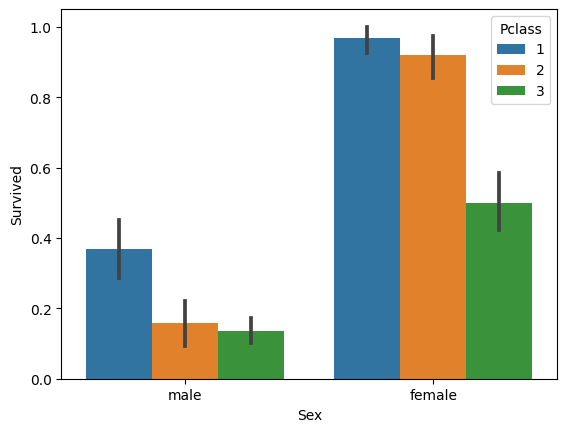

In [ ]:
sns.barplot(data=df_train, x="Sex", y="Survived", hue="Pclass")

Com base nas medidas acima pudemos identificar vários números referente aos dados, média,
variação, etc.

**Amostragem e Probabilidade:**
1. Realize amostragem aleatória para criar conjuntos de treinamento e teste para avaliar o desempenho do modelo de machine learning.
2. Calcule a probabilidade de sobrevivência com base em diferentes características, como gênero ou classe, e compare-as.

In [ ]:
amostra = df_train.sample(n = 50, random_state = 42, replace = False)
amostra.shape

(50, 13)

In [ ]:
eventoMale = len(df_train.loc[df_train['Sex'] == 'male'])
espacoAmostral = len(df_train)
probabilidadeGenero = eventoMale / espacoAmostral
probabilidadeGenero

0.6475869809203143

In [ ]:
eventoFemale = len(df_train.loc[df_train['Sex'] == 'female'])
espacoAmostral = len(df_train)
probabilidadeGenero = eventoFemale / espacoAmostral
probabilidadeGenero

0.35241301907968575

In [ ]:
eventoClasse1 = len(df_train.loc[df_train['Pclass'] == 1])
espacoAmostral = len(df_train)
probabilidadeClasse = eventoClasse1 / espacoAmostral
probabilidadeClasse

0.24242424242424243

In [ ]:
eventoClasse2 = len(df_train.loc[df_train['Pclass'] == 2])
espacoAmostral = len(df_train)
probabilidadeClasse = eventoClasse2 / espacoAmostral
probabilidadeClasse

0.20650953984287318

In [ ]:
eventoClasse3 = len(df_train.loc[df_train['Pclass'] == 3])
espacoAmostral = len(df_train)
probabilidadeClasse = eventoClasse3 / espacoAmostral
probabilidadeClasse

0.5510662177328844

In [ ]:
probabilidadeConjunta = (eventoMale / espacoAmostral) * (eventoClasse3 / espacoAmostral)
probabilidadeConjunta

0.3568633082288152

In [ ]:
probabilidadeConjunta = (eventoFemale / espacoAmostral) * (eventoClasse1 / espacoAmostral)
probabilidadeConjunta

0.0854334591708329

Com a técnica de probabilidade pudemos compreender a probabilidade de tal fenômeno
acontecer no momento do Titanic.

**Regressão Linear:**
1. Aplique regressão linear para prever a taxa de sobrevivência com base em características relevantes.
2. Avalie a importância de cada variável independente no modelo de regressão linear.
3. Analise a qualidade do ajuste do modelo e interprete os coeficientes resultantes.

In [ ]:
x = df_train[['Age','Sex', 'Fare', 'Pclass']]
y = df_train['Survived']

In [ ]:
x.loc[:, 'Sex'] = x['Sex'].map({'female': 0, 'male': 1})
x.loc[:, 'Age'] = x['Age'].fillna(x['Age'].mean())

<ipython-input-63-f79ae9401f2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:, 'Sex'] = x['Sex'].map({'female': 0, 'male': 1})
<ipython-input-63-f79ae9401f2e>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:, 'Sex'] = x['Sex'].map({'female': 0, 'male': 1})
<ipython-input-63-f79ae9401f2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
regressao_linear = LogisticRegression()

In [ ]:
regressao_linear.fit(x,y)

LogisticRegression()

In [ ]:
y_pred = regressao_linear.predict(x)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

Para finalizar com as técnicas do machine learning pudemos comparar alguns dados e
implementar algoritmos inteligentes.

**Machine Learning:**
1. Implemente algoritmos de classificação, como árvores de decisão e radom forest, para prever a sobrevivência dos passageiros.
2. Realize a validação cruzada para avaliar o desempenho do modelo e ajustar os hiperparâmetros adequados.
3. Compare diferentes algoritmos e técnicas de machine learning em termos de precisão, recall ou outras métricas relevantes.

*   Faça suas considerações finais, destacando as inferências que puderam ser feitas com a análise.
*   Crie um dataframe com 2 colunas (Passageiro e Sobreviveu), para cada passageiro no conjunto de testes, você deve prever um valor 0 ou 1 (0 - morreu, 1 - sobreviveu).
*   Faça seus próprios comentários em cada item.
*   Tenha atenção a apresentação.
*   Publique seu trabalho no GitHub (atenção, a publicação deve estar com os gráficos e tabelas abertos, os seja, devem ficar visíveis no GitHub)

Para finalizar acredito ue podemos fazer diversas análises, as quais, homens morreram mais que as mulheres, a primeira classe ou classe mais baixa sobreviveu mais, a os dados como média e soma referente aos dados do Titanic.

In [ ]:
df_train[['PassengerId', 'Survived']]

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [ ]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = arvore.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

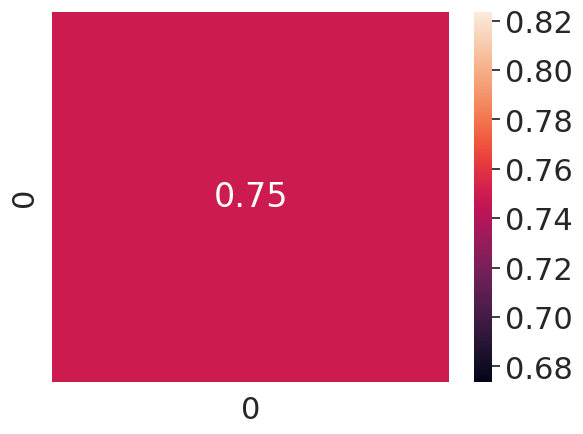

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
show_box(accuracy)

In [ ]:
floresta = RandomForestClassifier()

In [ ]:
floresta.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict = floresta.predict(X_test)
y_predict

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [ ]:
accuracy_score(y_test, y_predict)

0.7932960893854749

Para finalizar, pudemos analisar a fundo os dados do Titanic, uma catástrofe que aconteceu a
muito tempo e matou diversas pessoas de várias classes sociais.